# Feature Scaling

***Data Preprocessing and Feature Engineering***
1) Detecting and Handling Outliers
2) Missing Values Imputation
3) Encoding Categorical Features
4) Feature Scaling
5) Extracting Information
6) Combining Information

- Feature scaling is a process of transforming numerical columns to a common scale

#### Types of Feature Scaling
- ***1) Normalization***
- It is a scaling of data from the original range, so that all the values are within the new range of 0 and 1
- Affected by the outliers
    1) MaxAbsScaler
    2) MinMaxScaler
    3) Robust Scaler
- ***2) Standardization (Z-Score Normalization)***
- It is a scaling of data from the original range, so that all the values are centered around mean within a standard deviation of 1
- ***Note***
   - After scaling, the distribution of the data does not change
   - Use standardization, if the data is normally distributed, otherwise use normalization
   - Standardization is more robust to outliers
   

### Need of Scaling the Data
- Many machine learning algorithms perform better or converge faster, when features are on a relatively similar scale and close to normally distributed 
- All distance based ML algorithms (KNN, K-means, SVM) require feature scaling
- All Gradient Based ML algorithms (Linear Regression, Logistic Regression, Neural Network) require feature scaling
- Principal Components analysis also require feature scaling as PCA tries to get the features with maximum variance, and the variance is high for high magnitude features 
- Tree Bases Algorithms like Decision Tree, Random Forest and Gradient Boosting, as well as Naive Bayes and Linear Discriminant Analysis do not require features scaling 

- sklearn.preprocessing
    - MaxAbsScaller
    - MinMaxScaler
    - RobustScaller
    - StandardScaller

#### Practical Example

In [1]:
import pandas as pd
df = pd.DataFrame({'f1': [15,18,12,10],
                  'f2': [1,3,2,5]})
df

,f1,f2
0,15,1
1,18,3
2,12,2
3,10,5


#### MaxAbsScaller
- MaxAbsScalar divide each data point by the absolute maximum, so that the maximal absolute value of each feature in the training set is 1.0.
- It does not shift/center the data and thus does not destroy any sparsity.
- On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.
- 𝑥 = 𝑥𝑖 / 𝑚𝑎𝑥(|𝑥|)

In [3]:
from sklearn.preprocessing import MaxAbsScaler
scaller = MaxAbsScaler()
arr = scaller.fit_transform(df)
df2 = pd.DataFrame(arr, columns = ['f1', 'f2'])
df2

,f1,f2
0,0.833333,0.2
1,1.000000,0.6
2,0.666667,0.4
3,0.555556,1.0


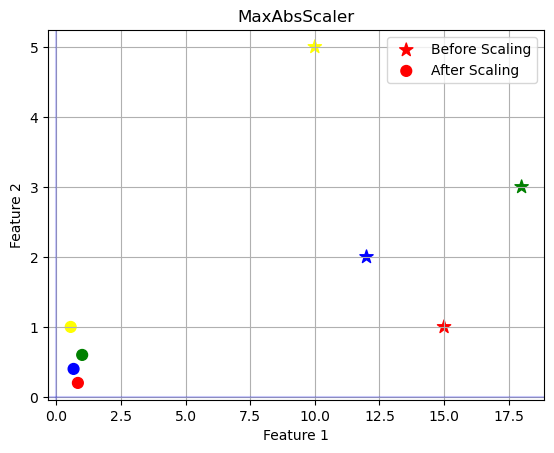

In [7]:
# Visualization before and after scaling
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
colors = ['red','green','blue','yellow']
ax.scatter(x = df.f1, y = df.f2, label = 'Before Scaling', color = colors , marker = '*', s = 100)
ax.scatter(x = df2.f1, y = df2.f2, label = 'After Scaling', color = colors , marker = 'o', s = 60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("MaxAbsScaler")
plt.legend(loc='best')
plt.axhline(0, color='blue',alpha=0.2)
plt.axvline(0, color='blue',alpha=0.2);
plt.grid(True)

#### MinMaxScaller
- The MinMaxScalar scales and translates the feature values such that they fall in the range of [0,1] . If there are negative values, it shrinks the data within the range of [-1,1].
- When the value of is the minimum value in the column, the numerator will be 0, and hence will be 0
- On the other hand, when the value of is the maximum value in the column, the numerator is equal to the denominator and thus the value of will be 1
- If the value of is between the minimum and the maximum value, then the value of will be between 0 and 1
- This scaller responds well if the standard deviation is small and when a distribution is not Gaussian-
- This scaller is sensitive to outliers
- x = (x - min(x))/(max(x) - min(x))

In [8]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
arr = scaler.fit_transform(df)
df2 = pd.DataFrame(arr, columns = ['f1', 'f2'])
df2

,f1,f2
0,0.625,0.00
1,1.000,0.50
2,0.250,0.25
3,0.000,1.00


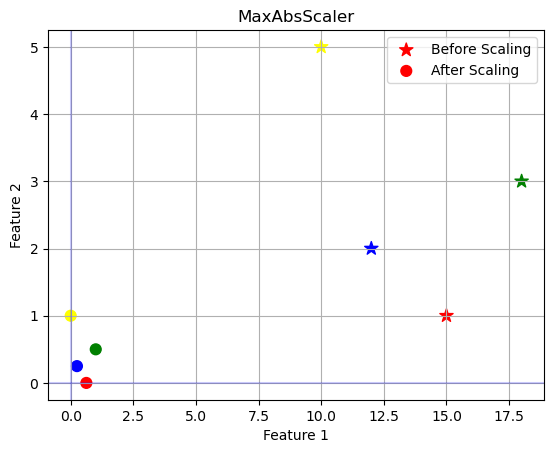

In [9]:
# Visualization before and after scaling
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
colors = ['red','green','blue','yellow']
ax.scatter(x = df.f1, y = df.f2, label = 'Before Scaling', color = colors , marker = '*', s = 100)
ax.scatter(x = df2.f1, y = df2.f2, label = 'After Scaling', color = colors , marker = 'o', s = 60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("MaxAbsScaler")
plt.legend(loc='best')
plt.axhline(0, color='blue',alpha=0.2)
plt.axvline(0, color='blue',alpha=0.2);
plt.grid(True)

### Standard Scaler
- StandardScaler is the industry’s go-to algorithm 🙂
- It rescales the data (Both the scale) from original range, so that all values are centered around the mean of zero with a standard deviation of one.
- StandardScalar assumes that you are working with normally distributed data and the outliers are not too crazy (Outliers should be handled explicitly)
- x = (x - mean(x))/std(x)
- ***Note:*** The values are not restricted to a particular range, although majority will fall within around mean

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = scaler.fit_transform(df)
df2 = pd.DataFrame(arr, columns = ['f1', 'f2'])
df2

,f1,f2
0,0.412393,-1.183216
1,1.402136,0.169031
2,-0.577350,-0.507093
3,-1.237179,1.521278


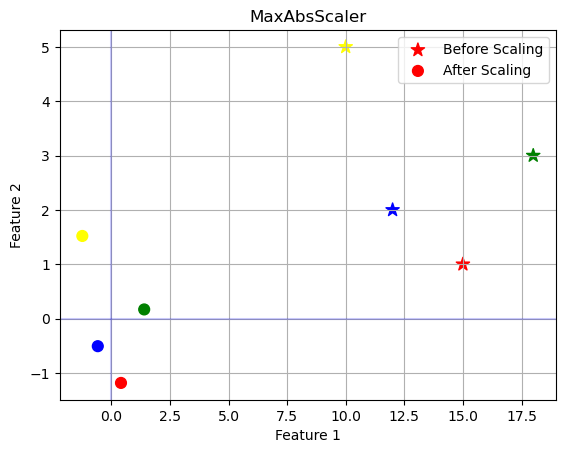

In [13]:
# Visualization before and after scaling
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
colors = ['red','green','blue','yellow']
ax.scatter(x = df.f1, y = df.f2, label = 'Before Scaling', color = colors , marker = '*', s = 100)
ax.scatter(x = df2.f1, y = df2.f2, label = 'After Scaling', color = colors , marker = 'o', s = 60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("MaxAbsScaler")
plt.legend(loc='best')
plt.axhline(0, color='blue',alpha=0.2)
plt.axvline(0, color='blue',alpha=0.2);
plt.grid(True)

### Robust Scaling
- This scale is robust to outliers
- Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.
- Instead of subtracting the mean, you subtract data values from the median (50th percentile), and instead of dividing by the standard deviation, you divide by Inter Quartile Range (IQR)
- x = (x - median(x))/IQR

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
arr = scaler.fit_transform(df)
df2 = pd.DataFrame(arr, columns = ['f1', 'f2'])
df2


,f1,f2
0,0.352941,-0.857143
1,1.058824,0.285714
2,-0.352941,-0.285714
3,-0.823529,1.428571
